## ANN Assignment

A neural network model for detecting
intrusions or attacks on a computer network

For the assignment, following work has been done
* TODO
 

# Import required libraries



In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Declare which Neural Networks to enable

In [ ]:
# comment out the neural networks to run in combination
nn_to_be_run=[]
nn_to_be_run.append("Multiclass")
# nn_to_be_run.append("Binary")
# nn_to_be_run.append("K-Fold")
# nn_to_be_run.append("SGD")
nn_to_be_run.append("Adam")

Helper method to read remote files

In [ ]:
def get_remote_file(file_url, file_name=None):
  # print this message if datat cannot be retrieved because of any reason like 
  # down server or bad internet connnection
  data_error_message="\nError retrieving data from " + str(file_url)+"\n"
  # print the success success with the hyperlink for the user to open for verifying
  data_success_message="\nData successfully retrieved from " + str(file_url)+"\n"
  # the statement should always be in try block as failure to retrieve data 
  # can result in a crash
  try:
    # if the filename is none, as in, the method has not been called for retieving dataset
    if file_name==None:
      # sends a GET request to the file_url
      f = requests.get(file_url)
      # print succes message if data rerieved successfully
      print(data_success_message)
      # return the data
      return f
    # the method has not been called for retieving dataset
    else: 
      # download the  datadet file having name, file_name and URL, dataset_url  
      data_path = tf.keras.utils.get_file(file_name, origin=dataset_url)
      # print succes message if data rerieved successfully
      print(data_success_message)
      # return the path of the data retrieved
      return data_path     
  except:
    print(error_message)

#The Features 
Since there are no columns labels provided in the dataset, they must be retrieved from the kddcup.names file

In [ ]:
# URL of the kddcup.names file that has the list of features
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.names'
# read the kddcup.names using the custom helper function
features=get_remote_file(names_url)
# print the features below
print(features.text)
# Except for the first line, which are the attack types, and
# will serve as target for our neural network,( but first 'normal' has to be added),
# rest are the  column names and their data types.


Data successfully retrieved from https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.names

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: con

# Attack Types
According to dataset attribute information
*   Good connection are rows with  target = 'normal' 
*   Bad connection types are
    * DoS(Denial of Service)
    * User to Root(U2R)
    * Remote to Local(R2L)
    * Probe

In [ ]:
# the URL of the training_attack_types on the KDD Cup 1999 Data homepage
attack_types_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/training_attack_types'
# read the attack types using the custom helper function
types = get_remote_file(attack_types_url)
# print the attack types below
print(types.text)


Data successfully retrieved from https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/training_attack_types

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




# Make a dictionary of attack types
add 'normal' as it was missing initially

---



In [ ]:
# Variable for the dictionary containing keys as target and values as their target types
attacks = {}
# splits a strings above into a list. The first element would contain target, and second the target type
target_category_split = types.text.split()
# therefore, for each element in the list, make the first as the key and second as the value  
for i in range(0, len(target_category_split)-1):     
    if "Multiclass" in nn_to_be_run:
      attacks[target_category_split[i]] = target_category_split[i+1]    
    if "Binary" in nn_to_be_run:
      attacks[target_category_split[i]] = "abnormal"
# IMPORTANT - add 'normal' as it was missing initially
attacks['normal'] = 'normal'
# print the dictionary
attacks

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'dos': 'warezclient',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'normal': 'normal',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'probe': 'smurf',
 'r2l': 'warezmaster',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'u2r': 'satan',
 'warezclient': 'r2l',
 'warezmaster': 'r2l'}

#Dataframe creation



In [ ]:
# url and filename of the 10 percent KDD dataset used for the assignment
dataset_url ='https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data_10_percent.gz'
# Name of the data file same as that on KDD Cup 1999 Data homepage
file_name = 'kddcup.data_10_percent.gz'
# retrieve the path of the datset using the custom helper function
data_path = get_remote_file(dataset_url,file_name)


Data successfully retrieved from https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data_10_percent.gz



In [ ]:
# read the dataset file using pandas read csv method and create the dataframe
df= pd.read_csv(data_path, header= None)
# print first 5 rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


number of rows in the dataset

In [ ]:
print("Total Rows: " +str(len(df)))

Total Rows: 494021


number of columns in the dataset




In [ ]:
print("Total Columns: " +str(len(df.columns)))

Total Columns: 42


In [ ]:
# extract column names from kddcup.names file
column_names = []

# split the string containing column names retrieved d=from kddcup.names on new line character to a list, features_split
features_split = features.text.split('\n')
# for each target type in the  features_split list
for i in range(1, len(features_split)):
  # as column name is on left side of : (see the  output of the feature, above)
  column_name = features_split[i].split(':')[0]
  # make the last column as 'target'
  if i == len(features_split)-1:
    column_name = 'target'
  #add all column names to the array
  column_names.append(column_name)
# print the array
column_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [ ]:
# assign the columns names to the dataframe
df.columns = column_names

#Count of each attack  type

>



In [ ]:
df.target.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

get rid of the extra dot at the end of each target

In [ ]:
# map actual type to another column called 'target_category'
# remove the last element ' . '
df['target_category'] = df.target.apply(lambda x : attacks[x[0:-1]] )
# now print the values to see
print(df.target_category.value_counts())
# dot removed

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: target_category, dtype: int64


In [ ]:
# the numer of columns have increased by 1
len(df.columns)

43

In [ ]:
# check missing values 
df.info()
# there is no missing data otherwise it should display the not-null counts for each feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

# Categorical Features Exploration

In [ ]:
# Get categorical features
# first get all the numeric column names
numeric_columns = df._get_numeric_data().columns 
# all columns - numerical columns gives the categorical columnns
categorical_columns = list(set(df.columns)-set(numeric_columns))
# print the names of the columns
categorical_columns

['target', 'service', 'protocol_type', 'flag', 'target_category']

# Binary Features Exploration

In [ ]:
# array for storing binary columns
binary_columns = []
# for each numerical column
for column in numeric_columns:
  # if the number of unique values is less than 2,
  # meaning 0 or 1, hence, it is a binary column
  if len(df[column].unique()) <= 2:
    binary_columns.append(column)

#Binary are currently in numeric columns. Add them to categorical columns 
Binary data can be treated like categorical data

In [ ]:
# all binary columns to categorical column names
temp_category=[]

for column in categorical_columns:
  temp_category.append(column)


for column in binary_columns:
  categorical_columns.append(column)
categorical_columns

['target',
 'service',
 'protocol_type',
 'flag',
 'target_category',
 'land',
 'logged_in',
 'root_shell',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']

# Plot the Categoritcal Data

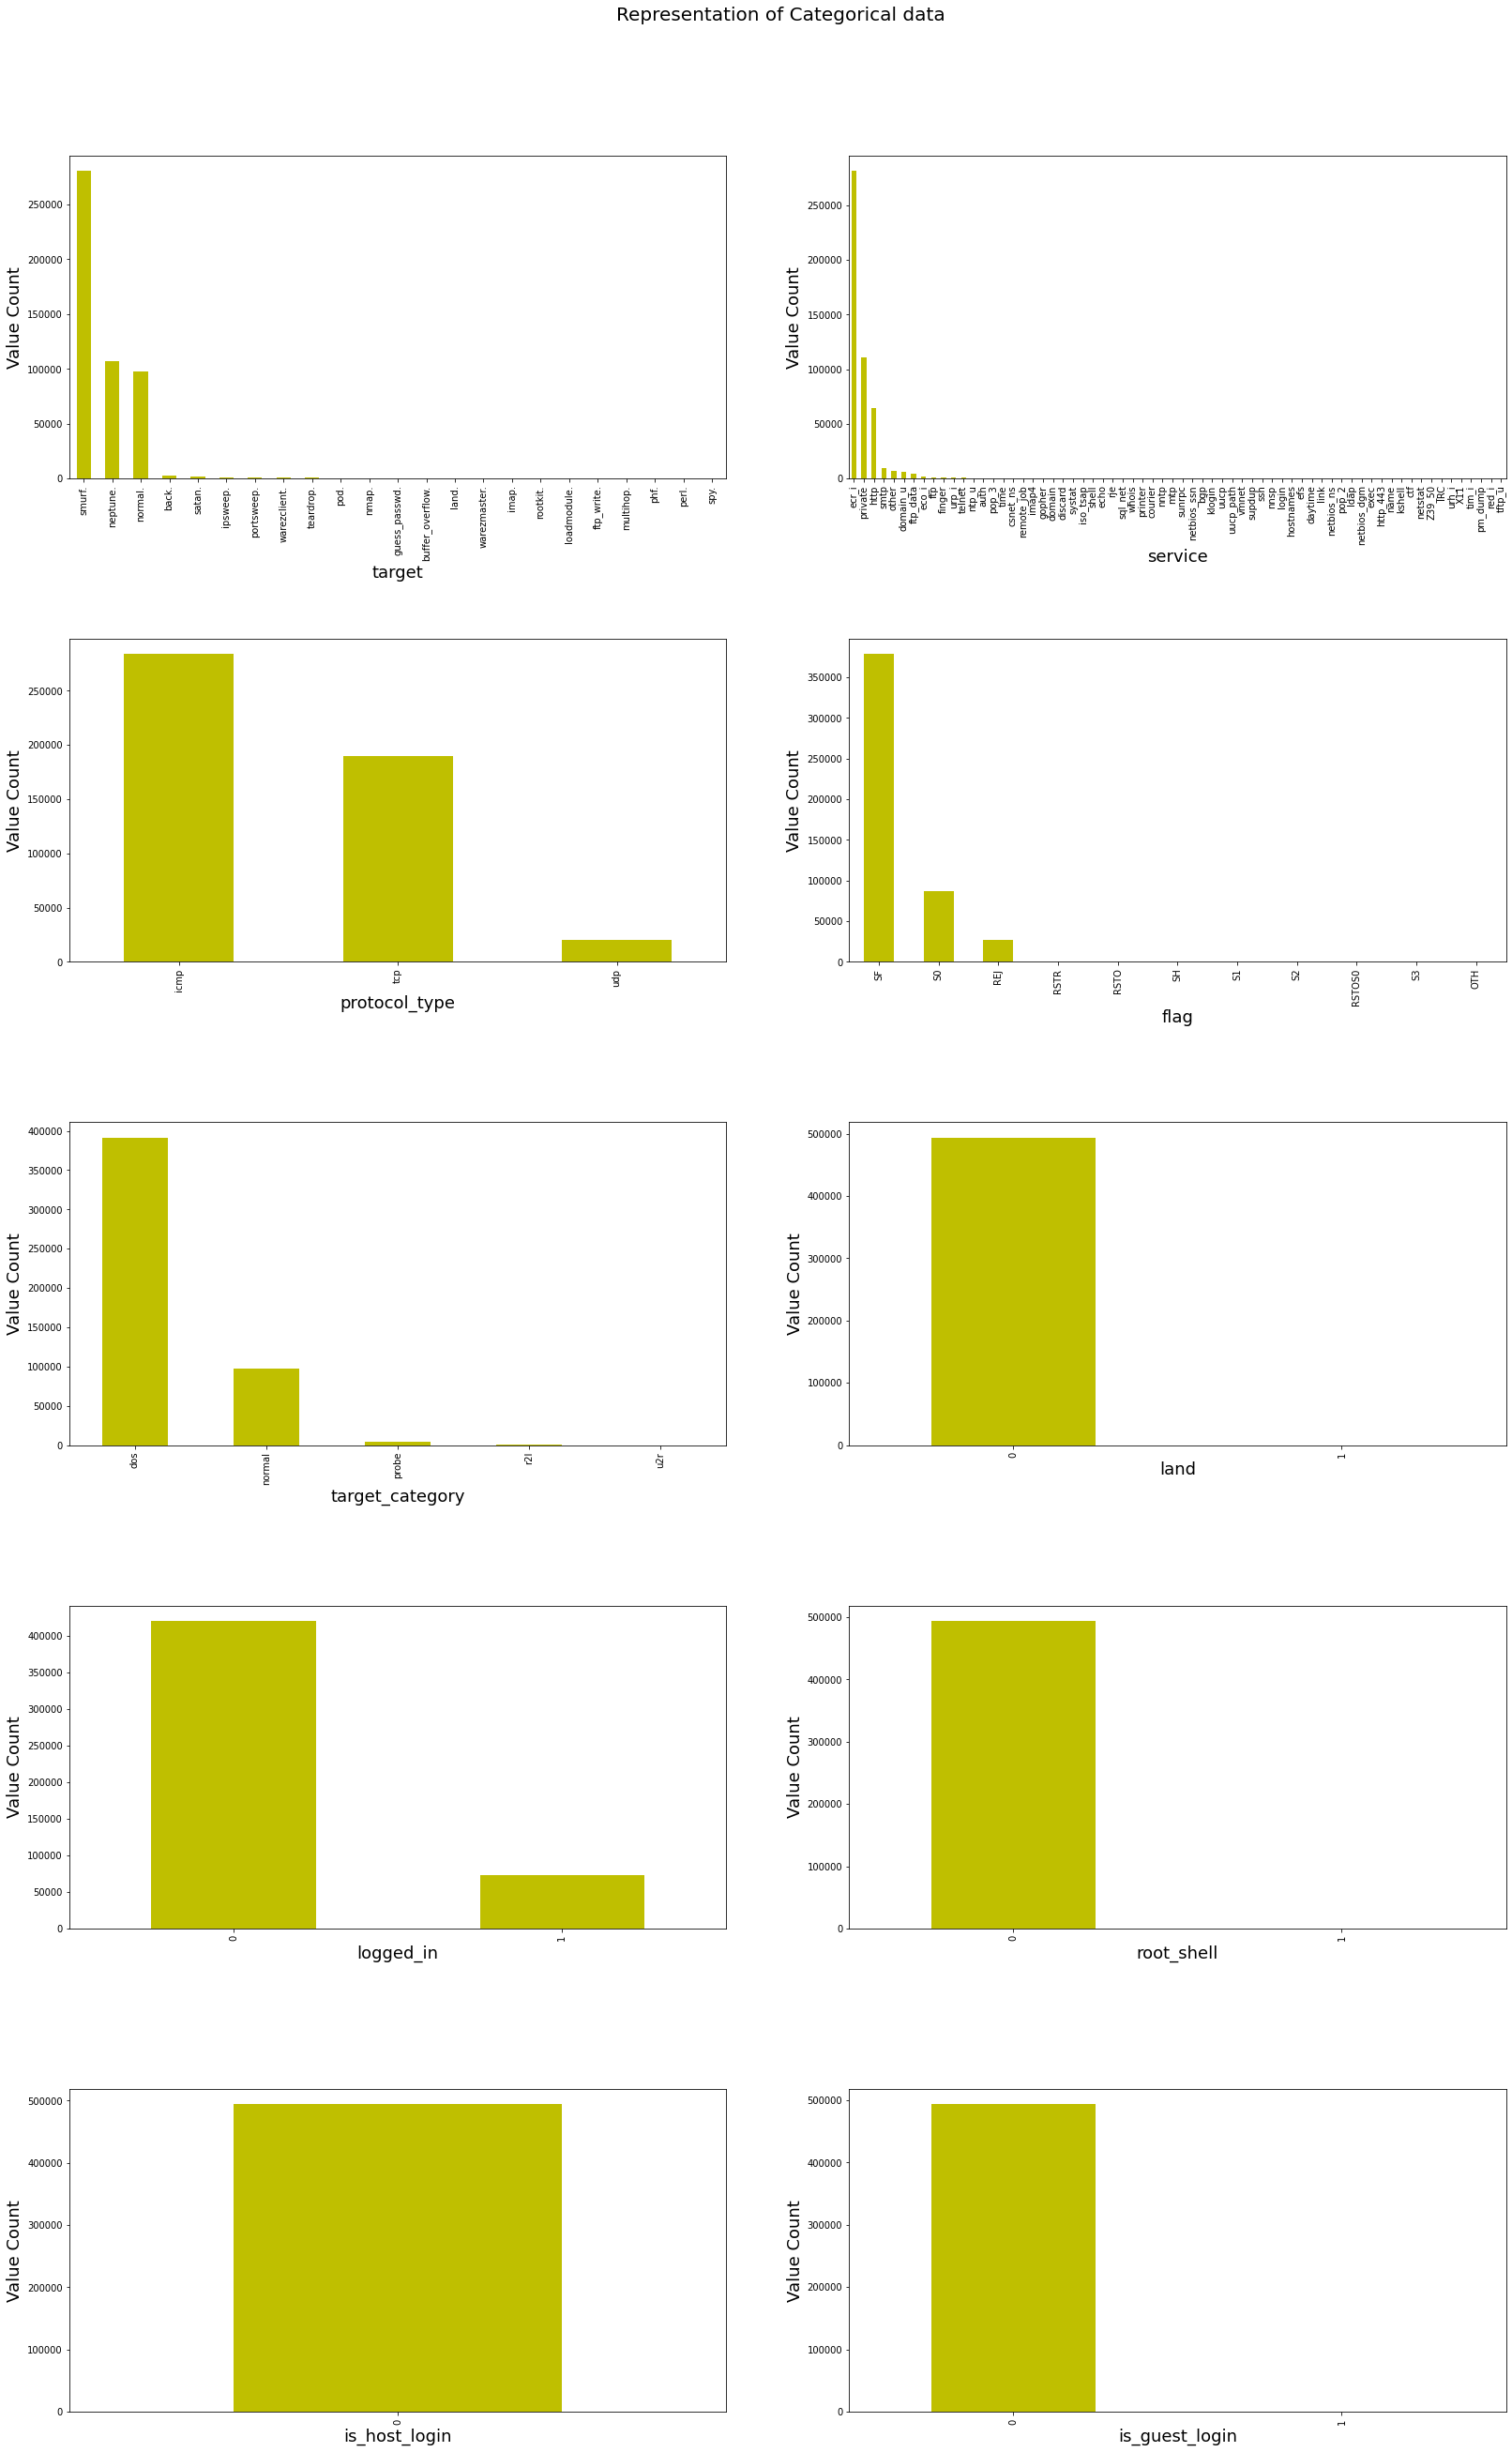

In [ ]:

def plot_value_count(column, ax):
    # plot the value_count of each of the categorical data
    df[column].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    # set x axis label as the column name
    ax.set_xlabel('{}'.format(column), fontsize=18)
    ax.set_ylabel("Value Count", fontsize=18)
    plt.xticks(rotation=90)
    return ax

# ax can be either a single Axes object or an array of Axes objects
# Make 5x2 matrix for plotting 10 graphs
fig, ax = plt.subplots(5,2, figsize = (22,40))
fig.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

# Get all columns for Plotting them
categorical_columns_for_plot = [ column for column in categorical_columns if column!='num_outbound_cmds']
# counter for plot number
k = 0
for i in range(5):
    for j in range(2):
        # Plot the current plot/graph
        plot_value_count(categorical_columns_for_plot[k], ax[i][j])
        k += 1
__ = plt.suptitle("Representation of Categorical data", fontsize= 20)

# It can be seen that some binary columns just contain just one value
# they dont effect the output, hence should be removed

# Numerical Features Exploration

In [ ]:
#Remaining numeric features by subtracting categorical columns
numeric_features = list(set(numeric_columns)-set(categorical_columns))
numeric_features

['num_access_files',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_diff_host_rate',
 'hot',
 'urgent',
 'num_failed_logins',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'num_root',
 'srv_serror_rate',
 'num_file_creations',
 'src_bytes',
 'dst_bytes',
 'count',
 'dst_host_same_srv_rate',
 'srv_rerror_rate',
 'wrong_fragment',
 'diff_srv_rate',
 'rerror_rate',
 'num_shells',
 'srv_count',
 'serror_rate',
 'dst_host_same_src_port_rate',
 'srv_diff_host_rate',
 'duration',
 'su_attempted',
 'dst_host_count',
 'num_compromised',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate']

Plot the stanard deviation of the numerical data

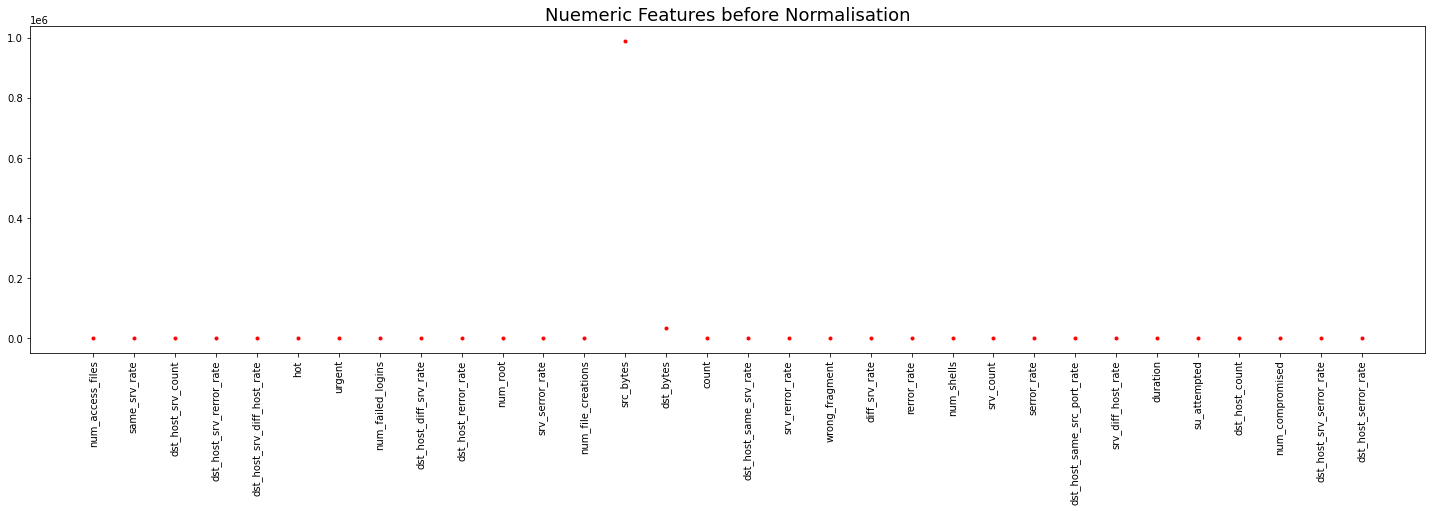

In [ ]:
# Plot the stanard deviation of the numerical data
def plot_standard_deviation(_title):
  # calculate the sstandard deviation
  df_std = df[numeric_features].std()
  # set the figure size to 25x6
  plt.figure(figsize=(25,6))
  # make red circles (ro) with x axis as the feature index and y axis as the deviation
  plt.plot(list(df_std.index) ,list(df_std.values), 'ro', markersize=3)
  # make ticks at 90 degrees
  plt.xticks(rotation=90)
  # Make the title of the graph
  plt.title(_title, fontsize= 18)
  # plot the configured graph
  plt.show()
# Plot the graph for each numerical feature and its respective deviation
plot_standard_deviation('Nuemeric Features before Normalisation')

> Different normal distributions are exists. Hence apply zscore 

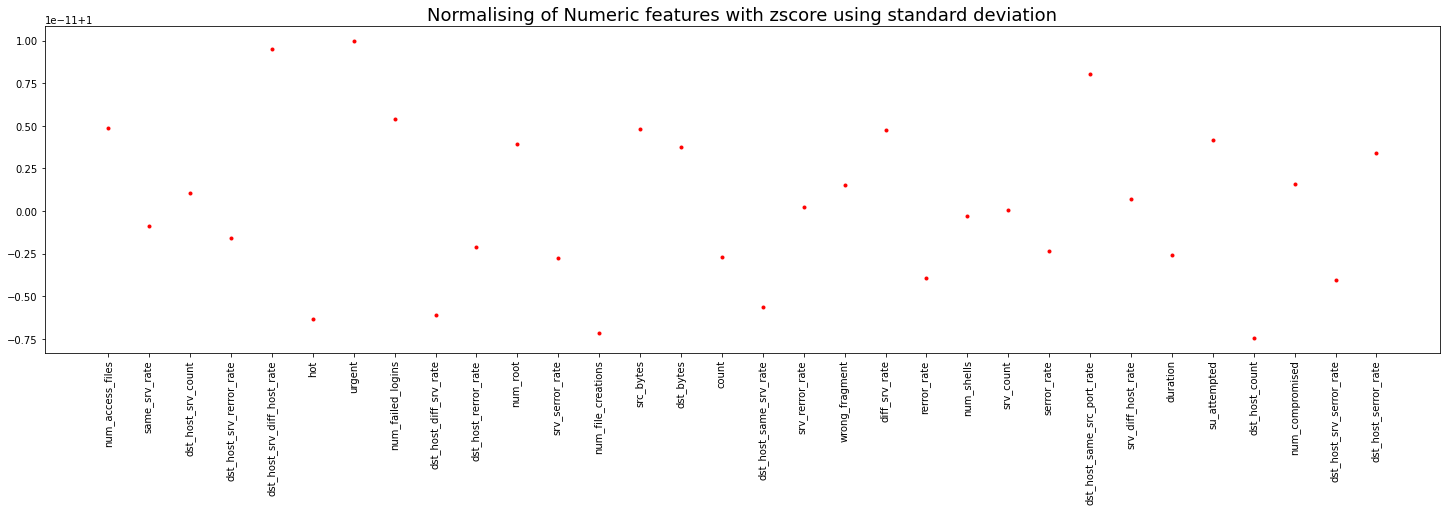

In [ ]:
# z score 
def apply_zscore(feature,deviation_type):
  # calculate the mean of the features
  mean = df[feature].mean() 
  # if the selected deviation is standard deviation, 
  if str(deviation_type)== "standard deviation":
    #  Using standard deviation
    deviation = df[feature].std()   
  else:
    #  Using absolute deviation  
    deviation= df[feature].mad()    
  #Formaula for z_score 
  df[feature] = (df[feature] - mean) / deviation

#  Using standard deviation
for feature in numeric_features:
  apply_zscore(feature,"standard deviation")
plot_standard_deviation('Normalising of Numeric features with zscore using standard deviation')

# #  Using absolute deviation 
# for feature in numeric_features:
#   apply_zscore(feature,"absolute deviation")
# plot_standard_deviation('Normalising of Numeric features with zscore using absolute deviation ')

# Data Correlation

In [ ]:
# drop columns with NaN values
df = df.dropna('columns')
# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]
# keep the old copy of the dataframe to draw the heatmap later
old_df=df

In [ ]:
# Fuction that select highly correlated features and removes the first feature that is correlated to any other feature
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Get the correlation between input of the dataframe with threshold 0.7
corr_features = correlation(df, 0.7)
# Remove the correlated features above the threshold
df = df.drop(corr_features, axis=1)

# Heat Map before Dimentionality Reduction
Plenty of light color cells (apart from the diagonal(as each input is obviously related to itself)), implyting that the some inputs are co-related


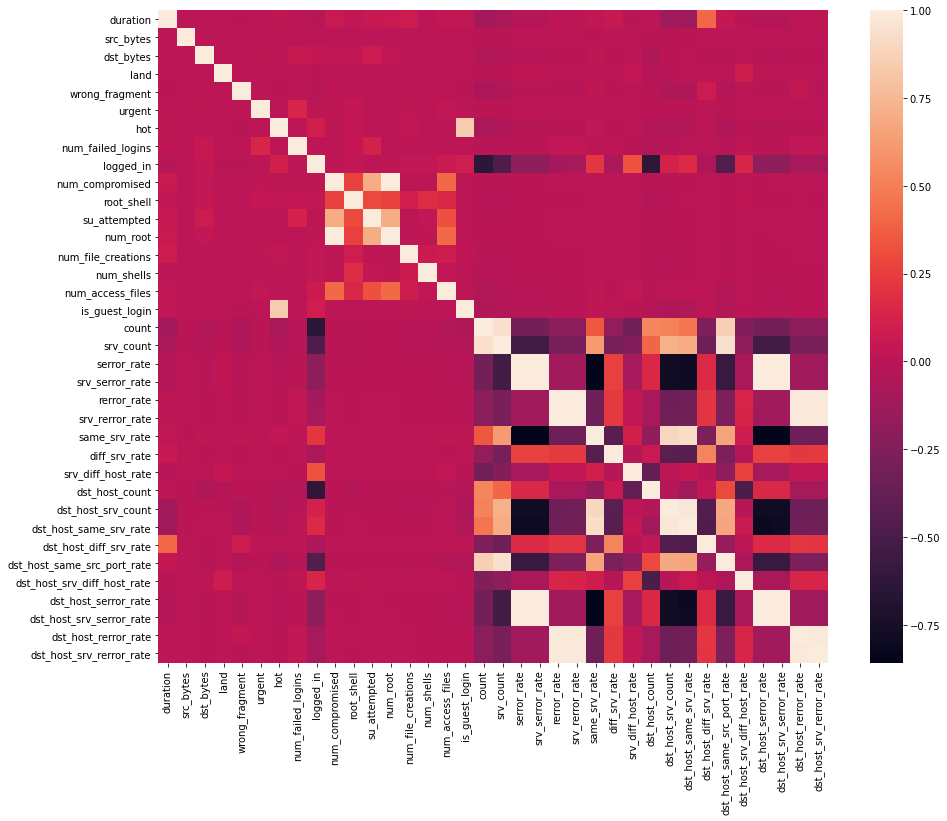

In [ ]:
# get the correlation of the old dataframe
corr = old_df.corr()
# Plot the heat map of the correlation matrix 
plt.figure(figsize=(15,12))
# Plot the correlation matrix using the seaborn library
sns.heatmap(corr)
# Plot the map
plt.show()

#Heat Map after Dimentionality Reduction

Light colored cells signifying co-related features have been eliminated



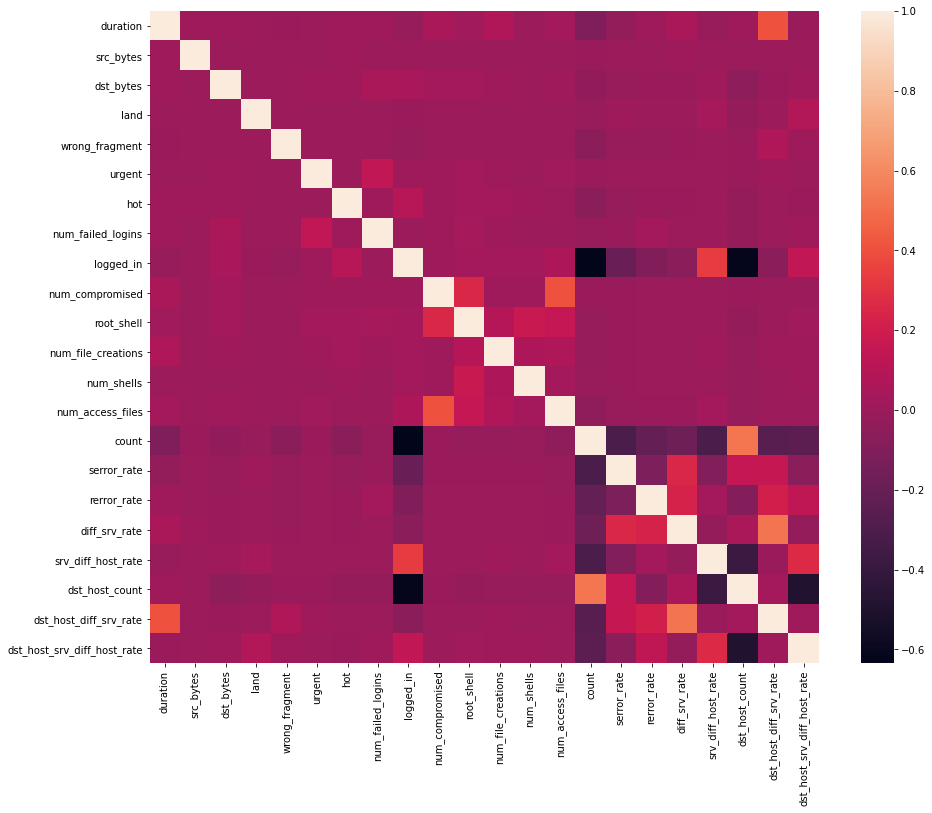

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

Dataset after Dimentionality Reduction

#One Hot Encoding

In [ ]:
# Convert categorical variable into dummy/indicator variables
def encode_into_dummy_columns(df, feature):
    # get the dummies using the panda library
    get_dummies = pd.get_dummies(df[feature])
    # for each column in dummies got for that column
    for x in get_dummies.columns:
        # name the dummies as  feature and the entry, x for which that column has been made
        dummy_name = f"{feature}-{x}"
        # Add the dummy column to the dataframe
        df[dummy_name] = get_dummies[x]
    # drop the current column for the feature an replace with the dummy columns
    df.drop(feature, axis=1, inplace=True)
    return None

# apply one hot encoding for categorical columns except the target and target types
for feature in temp_category:
  # if the feature is not target or target_category
  if feature not in ['target', 'target_category']:
    # Get the dummy columns for that input/feature
    encode_into_dummy_columns(df, feature)
    

In [ ]:
# it can be seen that extra columns have been added and original categorical columns have been replaced by their dummy columns, each unique entry representing a different column
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,target,target_category,service-IRC,service-X11,service-Z39_50,service-auth,service-bgp,service-courier,service-csnet_ns,service-ctf,service-daytime,service-discard,service-domain,service-domain_u,service-echo,service-eco_i,service-ecr_i,service-efs,...,service-other,service-pm_dump,service-pop_2,service-pop_3,service-printer,service-private,service-red_i,service-remote_job,service-rje,service-shell,service-smtp,service-sql_net,service-ssh,service-sunrpc,service-supdup,service-systat,service-telnet,service-tftp_u,service-tim_i,service-time,service-urh_i,service-urp_i,service-uucp,service-uucp_path,service-vmnet,service-whois,protocol_type-icmp,protocol_type-tcp,protocol_type-udp,flag-OTH,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH
0,-0.067792,-0.002879,0.138664,0,-0.04772,-0.002571,-0.044136,-0.009782,1,-0.005679,0,-0.011232,-0.009919,-0.027632,-1.521415,-0.464089,-0.24796,-0.255243,-0.203633,-3.451532,-0.282866,-0.158629,normal.,normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.067792,-0.002820,-0.011578,0,-0.04772,-0.002571,-0.044136,-0.009782,1,-0.005679,0,-0.011232,-0.009919,-0.027632,-1.521415,-0.464089,-0.24796,-0.255243,-0.203633,-3.297081,-0.282866,-0.158629,normal.,normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.067792,-0.002824,0.014179,0,-0.04772,-0.002571,-0.044136,-0.009782,1,-0.005679,0,-0.011232,-0.009919,-0.027632,-1.521415,-0.464089,-0.24796,-0.255243,-0.203633,-3.142630,-0.282866,-0.158629,normal.,normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.067792,-0.002840,0.014179,0,-0.04772,-0.002571,-0.044136,-0.009782,1,-0.005679,0,-0.011232,-0.009919,-0.027632,-1.530798,-0.464089,-0.24796,-0.255243,-0.203633,-2.988179,-0.282866,-0.158629,normal.,normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.067792,-0.002842,0.035214,0,-0.04772,-0.002571,-0.044136,-0.009782,1,-0.005679,0,-0.011232,-0.009919,-0.027632,-1.530798,-0.464089,-0.24796,-0.255243,-0.203633,-2.833728,-0.282866,-0.158629,normal.,normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# 100 columns for iputs + 2 for target and target_category
df.shape

(494021, 104)

In [ ]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag-REJ', 'flag-RSTO', 'flag-RSTOS0', 'flag-RSTR', 'flag-S0',
       'flag-S1', 'flag-S2', 'flag-S3', 'flag-SF', 'flag-SH'],
      dtype='object', length=104)

#PCA

In [ ]:
# # initialise a scaler feature variable
# scaler = MinMaxScaler()
# # drop the targets
# features = df.columns.drop(['target', 'target_category'])
# # get the values of the columns of the features
# features_values = df[features].values
# # encode the feature values 
# features_values = scaler.fit_transform(features_values)
# # Make an instance of PCA with 20 number of components
# principal_component_analysis = PCA(n_components=20)
# # make the input as the compressed or resduced dimentional input returned by the PCA
# x = principal_component_analysis.fit_transform(features_values)

# Prepare data for splitting it



In [ ]:
target_category_dummies = pd.get_dummies(df['target_category'])
# input features, so remove output columns
input_features = df.columns.drop(['target','target_category'])
# get the values for each feature
x = df[input_features].values
print('Input  features shapes : ' + str(x.shape))
# get dummy coluns for output columns, like it was done for input columns

# Multi Class Classification  
# Each dummy column represents each target type
target = target_category_dummies.columns 
num_classes = len(target)
y = target_category_dummies.values
print('Output features shape : ' + str(y.shape))

Input  features shapes : (494021, 102)
Output features shape : (494021, 5)


# Train-Test data Splitting

In [ ]:
# split the data  with 20% as test data and 80% as training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
print('Input  features shapes (Training) is ' + str(X_train.shape))
print('Output features shapes (Training) is ' + str(y_train.shape))
print('Input  features shapes (Testing) is ' + str(X_test.shape))
print('Output features shapes (Training) is ' + str(y_test.shape))

Input  features shapes (Training) is (395216, 102)
Output features shapes (Training) is (395216, 5)
Input  features shapes (Testing) is (98805, 102)
Output features shapes (Training) is (98805, 5)


# Model Creation

In [ ]:
# Build the neural network model
def sequential_model_builder():
    # create an instance of sequential model
    model = Sequential()
    # Add layer with 'relu' activation function
    # kernel_initializer, defines the way to set the initial random weights of hidden layers
    # set the initial weights according to random uniform distribtion of the neurons of the hidden layer
    model.add(Dense(x.shape[1],input_dim =x.shape[1],activation = 'relu',kernel_initializer='random_uniform'))
    # add another layer with 1 neuron, relu activation and random weight initialisation
    model.add(Dense(16,activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(64,activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(16,activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(5,activation='relu',kernel_initializer='random_uniform'))
 
    # add last layer with output number of neurons and 'softmax' activation  
    model.add(Dense(y.shape[1],activation='softmax'))   
    return model

 # Model Evaluation

In [ ]:
def evaluate_nn_model(model):
    # verbose will show nothing (silent)
    # returns the training accuracy
    # Evaluate the model on the training set
    _, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    # Evaluate the model on the testing set
    # returns the testing accuracy
    _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Train: %.5f, Test: %.5f' % (train_accuracy, test_accuracy))
    return None

# Plot Graph

In [ ]:
def plot_nn_results(history, optimizer, loss_fun):
    plt.figure(figsize=(25,6))
    # plot loss during training
    plt.subplot(121)
    # make the title as loss
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    # plot accuracy during training
    plt.subplot(122)
    # make the graph on right side as accuracy graph
    plt.title('Accuracy')
    # plot training accuracy
    plt.plot(history.history['accuracy'], label='train')
    # plot testing accuracy
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    # print as subtitle , the loss funciton
    # plt.suptitle(f"{optimizer} Optimizer with {loss_fun} as Loss function", fontsize= 23)
    # display the graph
    plt.show()
    return None

# K-Fold Cross Validation

In [ ]:
if "K-Fold" in nn_to_be_run:
  # An array for storing accuracy per fold
  acc_per_fold = []
  # An array for storing loss per fold
  loss_per_fold = []
  # An variable for storing number of folds
  num_folds=5
  # An variable for storing epochs per fold
  epoch_per_fold=2

  # Concatenate the input values to be passed to the K-fold library
  inputs = np.concatenate((X_train, X_test), axis=0)
  # Concatenate the output values to be passed to the K-fold library
  targets = np.concatenate((y_train, y_test), axis=0)

  # Define the K-fold Cross Validator
  k_fold = KFold(n_splits=num_folds, shuffle=False)

  # K-fold counter
  fold_count = 1

  # Array for storing accuracies
  accuracies_for_folds = []
  # Array for storing all accuracies
  losses_for_folds = []
  # Array for storing all k accuracies
  folds = []
  # Define an array representing the entire k folds
  entire_history_kfold = []


  for train, test in k_fold.split(inputs, targets):

    # model with crossentropy loss and adam optimizer
    model = sequential_model_builder()
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    history = model.fit(inputs[train],targets[train],epochs=epoch_per_fold)
    # Append the record of training loss values and metric values and the index of the Kth-fold
    entire_history_kfold.append([history, fold_count])
    scores= model.evaluate(inputs[test],targets[test], verbose=0)

    # add the accuracy for each fold 
    accuracies_for_folds.append(scores[1])
    # add the losses for each fold
    losses_for_folds.append(scores[0])
    # add the fold number 
    folds.append([inputs[train], targets[test]])
    
    print('------------------------------------------------------------------------')
    print(f'On fold {fold_count} ...')
    print(f'Score for the fold {fold_count}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increement fold number counter
    fold_count += 1

  # Store the index of the training fold that the neural network model performed best with (classification accuracy)
  best_fold_index = np.argmax(accuracies_for_folds, axis=0)

  # Store the row-wise structure of the training datatset before K-fold Cross Validation (CV) updates the training dataset
  training_dataset_before = X_train.shape[0]

  # Update the network packet information and intrusion type category data, used for training the neural network model
  X_train = folds[best_fold_index][0]
  y_train = folds[best_fold_index][1]

  print("best accuracy for  fold {0} ".format(best_fold_index + 1, accuracies_for_folds[best_fold_index] * 100, losses_for_folds[best_fold_index]))

#Using Adam optimiser

Epoch 1/30
3088/3088 - 7s - loss: 0.1900 - accuracy: 0.9530 - val_loss: 0.0400 - val_accuracy: 0.9949
Epoch 2/30
3088/3088 - 7s - loss: 0.0384 - accuracy: 0.9967 - val_loss: 0.0163 - val_accuracy: 0.9968
Epoch 3/30
3088/3088 - 7s - loss: 0.0150 - accuracy: 0.9983 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 4/30
3088/3088 - 7s - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0063 - val_accuracy: 0.9991
Epoch 5/30
3088/3088 - 7s - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 6/30
3088/3088 - 7s - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 7/30
3088/3088 - 6s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 8/30
3088/3088 - 7s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 9/30
3088/3088 - 7s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 10/30
3088/3088 - 7s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0030 - 

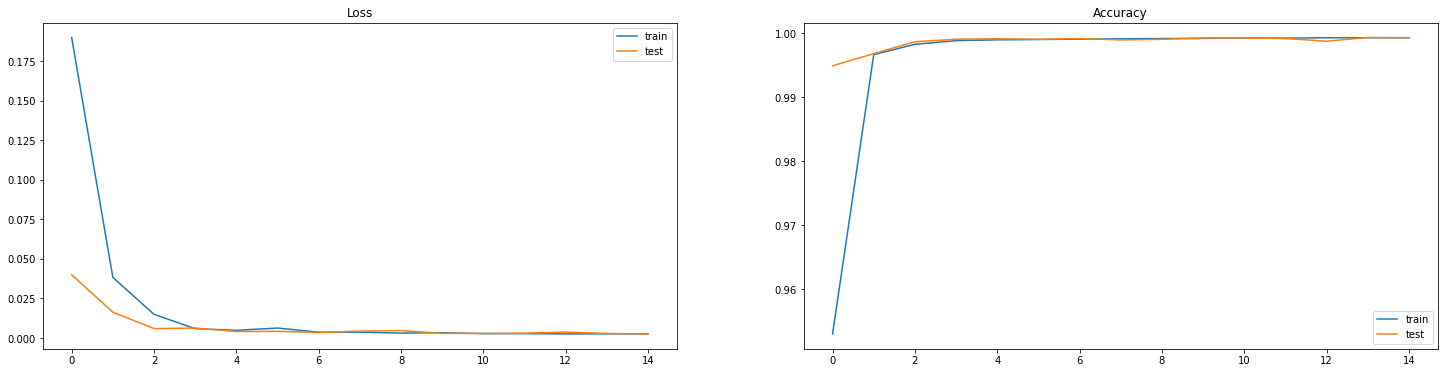

In [ ]:
if "Adam" in nn_to_be_run:
  # model with crossentropy loss and adam optimizer
  model = sequential_model_builder()
  # compile the  model 
  model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  # Early stop  when loss starts increasing after patience of 10 and min_delta=1e-3
  # verbose=1 prints on screen
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
  # collect the history to be used for ploting graphs and anaysing later
  history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,callbacks=[monitor],verbose=2,epochs=30)
  # Start the evaluation of the model
  evaluate_nn_model(model)
  # plot the output graph, according to values stored in history
  plot_nn_results(history, 'Adam', 'categorical_crossentropy')

# Using Stochastic Gradient Descent optimiser

In [ ]:
if "SGD" in nn_to_be_run:
  # Similarly using the SGD optimse instead of Adam optimiser, this time
  # model with crossentropy loss and SGD optimizer
  model = sequential_model_builder()
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss ='categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
  history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=30)
  evaluate_nn_model(model)
  plot_nn_results(history, 'SGD', 'categorical_crossentropy')

# Conclusion

The multi-class and the binary class intrusion detection system were tuned separately as the first one was far more complex. But the tuning of each of the systems was tuned very carefully starting with just 1 neuron and 1 layer and gradually increased to find the best-suited topology for the neural network.  Different activation functions were tried, ‘Relu’ was finalized for activation hidden layers and ‘SoftMax’ for the final layer. Finally, the batch size of 128, learning rate at 0.1, Adam optimizer, five K-folds, correlation threshold of 0.7, z-score using standard deviation, four intermediate neural layers with the number of neurons as sixteen, sixty-four, sixteen, and five respectively, gave the highest, most stable and reliable accuracy of 99.91 percent.

Many more classifiers like Decision tree, Naive Bayes, Random Forest, Support Vector Machine, K-Means clustering, K-Nearest neighbors can be used along with the correlation and PCA used in the experiment to compare the results. A deeper knowledge of the dataset to know the importance of each feature could be very useful. For example, the number of the occurrence of some of the attacks were extremely low. If they were not important, they could have been removed to get even higher accuracy. Since, in the end, there is a trade-off between the accuracy and the topology of the neural network. A better balance could have been achieved if the severity of each attack was known.